In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import MicroTools as micro
import MicroTools.plot_tools as pt

## This code perform 2D plotting or 3D with 1 parameter fixed.

In [20]:
# Our parameter scan
path_results = "fit_data/"
# data = np.load(f"{path_results}/Fixed_Ue4sq_1e-2_15*15_v3.npy", allow_pickle=True)
data = np.load(f"{path_results}/App_gm4_Um4sq_migrated_1_v3_normalized.npy", allow_pickle=True)

MVec, gm4VecT = data[:,0], data[:,1]
# MVec, gm4VecT = data[:,2], data[:,0]
MiniApp_chi2 = data[:,-3]
MicroApp_chi2 = data[:,-2]
MicroApp_Asimov_chi2 = data[:,-1]

MiniApp_deltachi2 = MiniApp_chi2 - np.min(MiniApp_chi2)
MicroApp_deltachi2 = MicroApp_chi2 - np.min(MicroApp_chi2)
MicroApp_Asimov_deltachi2 = MicroApp_Asimov_chi2 - np.min(MicroApp_Asimov_chi2)

# De Gouvea fit
MB = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]
MBlower = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_lower.dat')
MBupper = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_upper.dat')
MBc = np.vstack((MBlower,MBupper))
MB = np.loadtxt('MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_8303/2514451261.py:20: UserWarning: linewidths is ignored by contourf
  ax.tricontourf(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)


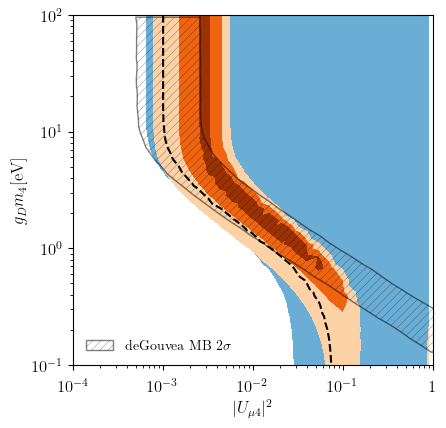

In [21]:
fig, ax = pt.std_fig(figsize=(pt.std_figsize[0], pt.std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-1, 1e2
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_ylabel(r'$g_D m_4 [\mathrm{eV}]$', fontproperties=pt.font)        
ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
#ax.set_yticks([1e-1, 1, 10, 100])
[l.set_size(pt.labelfont.get_size()) for l in ax.get_xticklabels()]
#[l.set_size(pt.labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
#ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=pt.labelfont)
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=pt.labelfont)
ax.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=pt.font)


levs0MB = np.min(MicroApp_chi2)
levsMiniB = [0, 2.30, 6.18, 11.83]
levsMicroB = [6.18, 1e10]
ax.tricontourf(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
ax.tricontour(MVec, gm4VecT, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors=['black'], alpha=1, linewidths=1.5, linestyles=['--'])
ax.tricontourf(MVec, gm4VecT, MiniApp_deltachi2, levels=levsMiniB, cmap='Oranges_r', alpha=1)

fleft = interp1d(10**MBupper[:,1], 10**MBupper[:,0], bounds_error=False, fill_value='extrapolate')
fright = interp1d(10**MBlower[:,1], 10**MBlower[:,0], bounds_error=False, fill_value='extrapolate')
y = np.geomspace(np.min([10**MBupper[:,1].min(), 10**MBlower[:,1].min()]), np.max([10**MBupper[:,1].max(), 10**MBlower[:,1].max()]))
ax.fill_betweenx(y, fleft(y), fright(y), edgecolor='black', hatch='////', facecolor='None', alpha=0.5, label='deGouvea MB $2\sigma$')
#ax.text(2e-4, 3e-1, '$|U_{e4}|^2$=0.01', fontsize = 15) 
ax.legend(loc = 'lower left', fontsize = 10)

fig.savefig(f"{micro.path_plots}/Fixed_Ue4sq_v4.pdf", bbox_inches='tight')

## Old plotting scripts

In [24]:
MuBAppDisT0 = np.load(f"{micro.path_osc_data}/App_gm4_Um4sq.npy", allow_pickle=True)
data = np.load(f"{micro.path_osc_data}/App_gm4_Um4sq_migrated_1_v2.npy", allow_pickle=True)
MuBAppDisT0_new = data[:,:-1]

PVs = np.load(f"{micro.path_osc_data}/gm4_Um4sq_PVs.npy", allow_pickle=True)
gm4VecT = PVs[0]
MVec = PVs[1]

MuBAppDisT = np.array((np.asarray(MuBAppDisT0.T[0])).reshape(len(gm4VecT), len(MVec)), dtype=float)
MuBAppDisTAs = np.array((np.asarray(MuBAppDisT0.T[1])).reshape(len(gm4VecT), len(MVec)), dtype=float)

MuBAppDisT_new = np.array((np.asarray(MuBAppDisT0_new.T[0])).reshape(len(gm4VecT), len(MVec)), dtype=float)
MuBAppDisTAs_new = np.array((np.asarray(MuBAppDisT0_new.T[1])).reshape(len(gm4VecT), len(MVec)), dtype=float)

ValueError: cannot reshape array of size 25 into shape (31,31)

In [15]:
MB = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]
MBlower = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_lower.dat')
MBupper = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_upper.dat')
MBc = np.vstack((MBlower,MBupper))

92.65762086182028


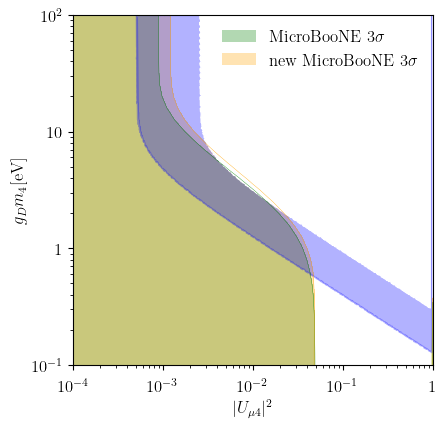

In [13]:
from MicroTools.plot_tools import *

# Load 95% contour from Miniboone.
MB = np.loadtxt('MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]

fig, ax = std_fig(figsize=(std_figsize[0], std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-1, 1e2
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_ylabel(r'$g_D m_4 [\mathrm{eV}]$', fontproperties=font)        
ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
ax.set_yticks([1e-1, 1, 10, 100])
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)
ax.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=font)        


levs0MB = np.min(MuBAppDisT)
levs0MB_new = np.min(MuBAppDisT_new)
print(levs0MB)
#levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
levsMB = [levs0MB, levs0MB + 11.83]
levsMB_new = [levs0MB_new, levs0MB_new + 11.83]
#ax.contourf(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.3)
#ax.contour(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=1, linewidths=0.25)
ax.contourf(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['green','green'], alpha=0.3)
ax.contour(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['green','green'], alpha=1, linewidths=0.25)
ax.contourf(MVec, gm4VecT, MuBAppDisT_new, levels=levsMB_new, colors=['orange','orange'], alpha=0.3)
ax.contour(MVec, gm4VecT, MuBAppDisT_new, levels=levsMB_new, colors=['orange','orange'], alpha=1, linewidths=0.25)
# ax.fill(MBX,MBY,color='Black',alpha=0.5)

ax.fill_between(x=10**MBlower[:,0],y1=10**MBlower[:,1],y2=100,color='blue', alpha=.3)
ax.fill_between(x=10**MBupper[:,0],y1=10**MBupper[:,1],y2=100,color='white')
plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'blue', alpha = .3, label=r'MiniBooNE $2\sigma$'),

legend_elements = [plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'green', alpha = .3, label=r'MicroBooNE $3\sigma$'),
                   plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'orange', alpha = .3, label=r'new MicroBooNE $3\sigma$')]
ax.legend(handles = legend_elements, loc = 'upper right', fontsize = 12)

fig.savefig(f"{micro.path_plots}/gm4_Um4sq_compare_migrated.pdf", bbox_inches='tight')